# `House Price Prediction using Linear Regression`.


We have a `USA based house price historical data`. Using which we create a model. The model allows to put in a few features of a house and returns back an estimate of what the house would sell for.

The data contains the following variables:

* `'Avg. Area Income'`: Avg. Income of residents of the city where the house is located.
* `'Avg. Area House Age'`: Avg Age of Houses in the same city.
* `'Avg. Area Number of Rooms'`: Avg Number of Rooms for Houses in same city.
* `'Avg. Area Number of Bedrooms'`: Avg Number of Bedrooms for Houses in same city.
* `'Area Population'`: Population of city where the house is located.
* `'Price'`: Price at which the house is sold.
* `'Address'`: Address for the house.


### `Import Libraries`.

In [1]:
# Importing the Necessary Packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### `Check out the Data`

In [2]:
# DataFrame Variable.
df_house = pd.read_csv('Housing_data.csv')

In [3]:
# To check the first 5 rows of the data.
df_house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# To check the number of rows and columns in the dataset.
df_house.shape

(5000, 7)

In [5]:
# Columns in our dataset (Dependent and Independent variables.)
df_house.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
# To check the data types of our features
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [7]:
# Statistical description of the data.
df_house.describe(exclude=None)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## `Exploratory Data Analysis`

In [8]:
# To remove duplicate records if present in the dataset.
df_house.drop_duplicates(inplace=True)
print(df_house.shape)

(5000, 7)


- Since the **`shape`** of the dataset is exactly same as before dropping the duplicates, Hence there are **`no duplicate`** records present in the dataset.

Let's create some simple plots to check out the data!

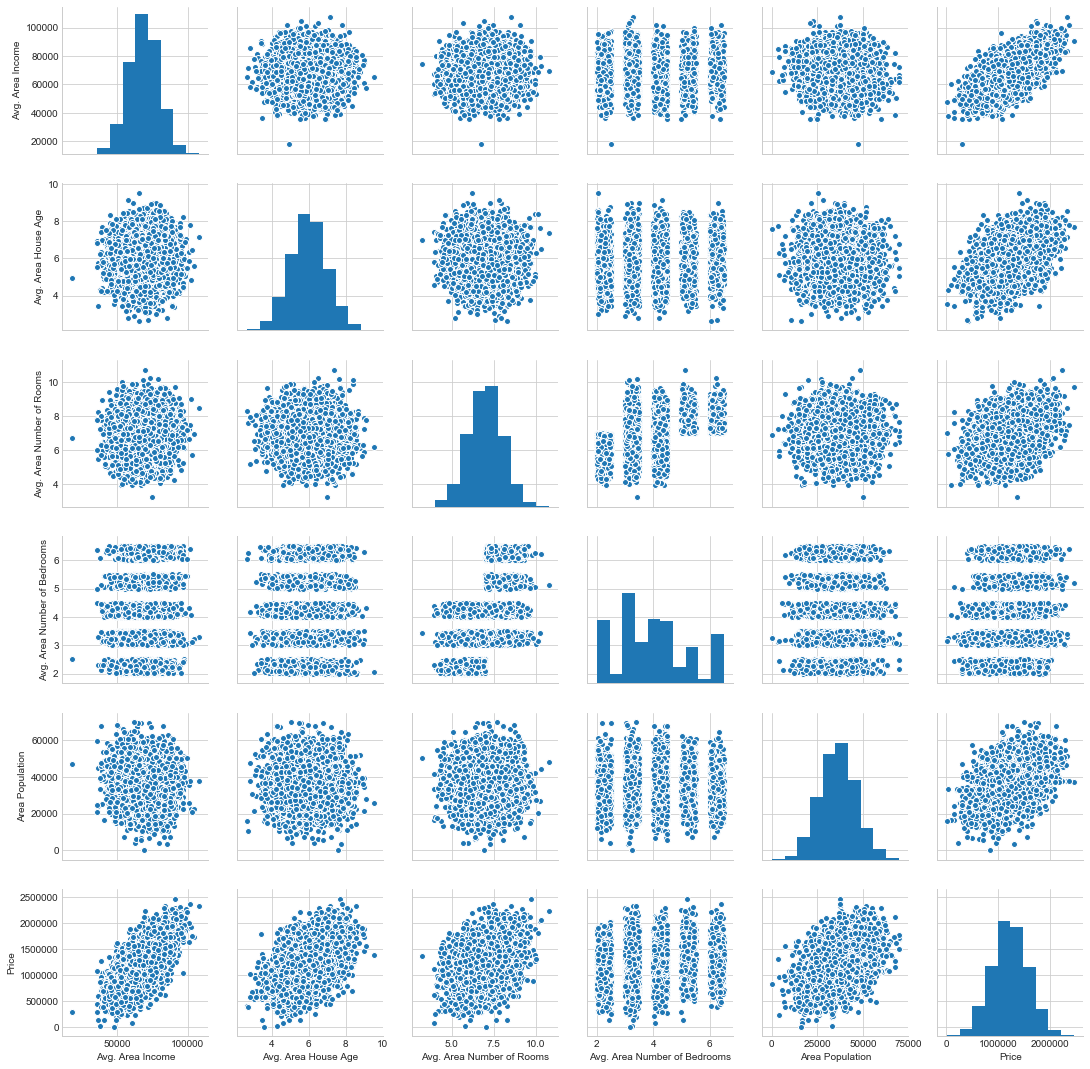

In [9]:
# To check the data distribution in each feature.
sns.set_style("whitegrid")
sns.pairplot(df_house) #hue ='Price')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


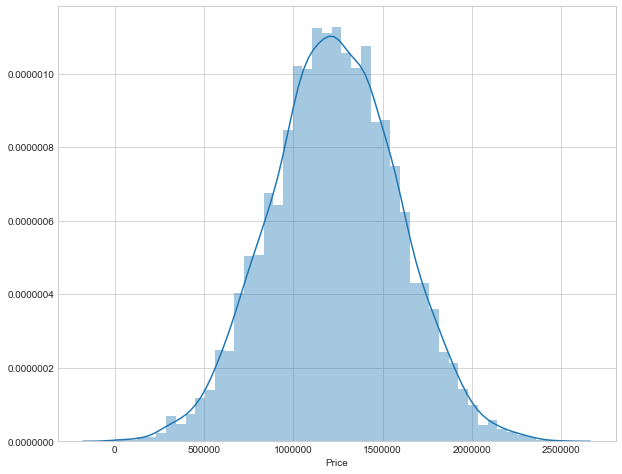

In [10]:
# To check the normality of the target variable.
plt.figure(figsize=(10,8))
sns.distplot(df_house['Price'])

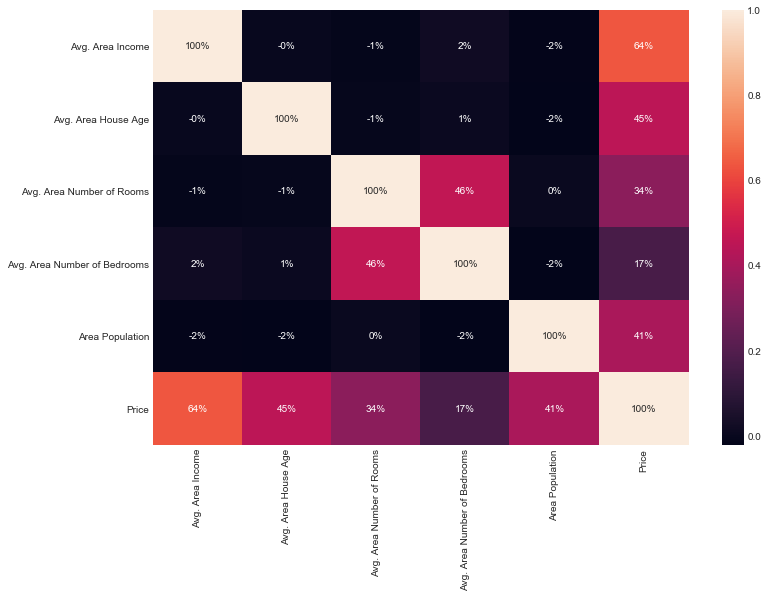

In [11]:
# To Visualilze the correlation between the features.
plt.figure(figsize=(12,8))
sns.heatmap(df_house.corr(), annot=True, fmt='0.0%')

In [12]:
# Dropping 'Address' feature since text data is not helpful for predictions.
df_house.drop('Address', axis=1, inplace=True)

## `Check for Outliers`.

- We detect the outliers by calculating **`Skewness & Kurtosis`**. For the normalized feature the `Skewness` should have a `range of values from -1 to +1`.
- We visualize the each feature using **`boxplot`** and **`distplot`** to detect the outliers.
- We treat outliers by calculating **`Z_Score`** and remove those datapoints which are away from **`Three Standard Deviations`**.

In [13]:
df_house.keys()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

## `Skewness`

In [14]:
from scipy import stats

In [15]:
stats.skew(df_house)

array([-0.03370986, -0.00721171, -0.04098361,  0.37612752,  0.05063449,
       -0.00271725])

In [16]:
# Skewness of the features.
pd.DataFrame(stats.skew(df_house), index=df_house.columns)

,0
Avg. Area Income,-0.033710
Avg. Area House Age,-0.007212
Avg. Area Number of Rooms,-0.040984
Avg. Area Number of Bedrooms,0.376128
Area Population,0.050634
Price,-0.002717


## `Kurtosis`

In [17]:
# Kurtosis of the features.
pd.DataFrame(stats.kurtosis(df_house), index=df_house.columns)

,0
Avg. Area Income,0.044329
Avg. Area House Age,-0.084554
Avg. Area Number of Rooms,-0.075777
Avg. Area Number of Bedrooms,-0.702064
Area Population,-0.007926
Price,-0.056063


## `Visualizing the features.`

### `1. Avg. Area Income`

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


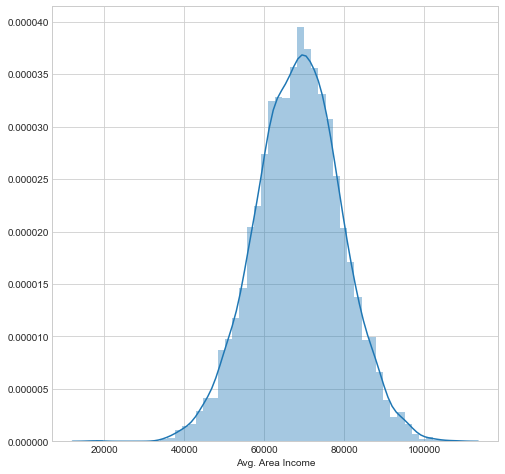

In [18]:
plt.figure(figsize=(8,8))
sns.distplot(df_house['Avg. Area Income'])

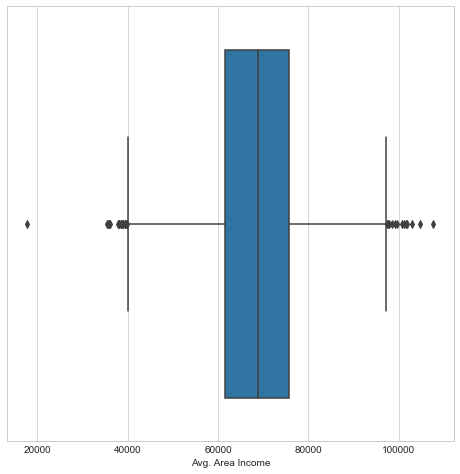

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(df_house['Avg. Area Income'])

### `2. Avg. Area House Age`

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


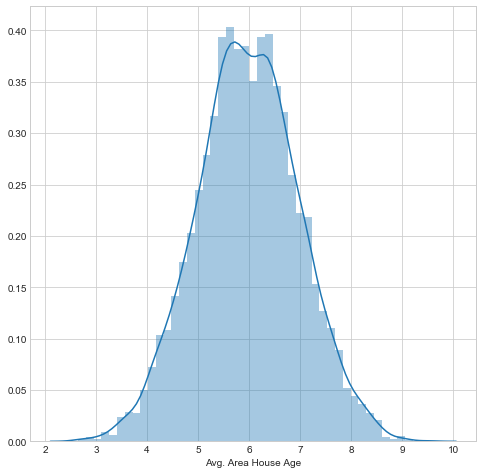

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(df_house['Avg. Area House Age'])

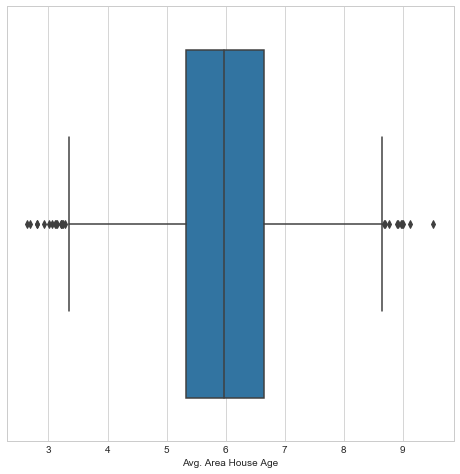

In [21]:
plt.figure(figsize=(8,8))
sns.boxplot(df_house['Avg. Area House Age'])

### `3. Avg. Area Number of Rooms`

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


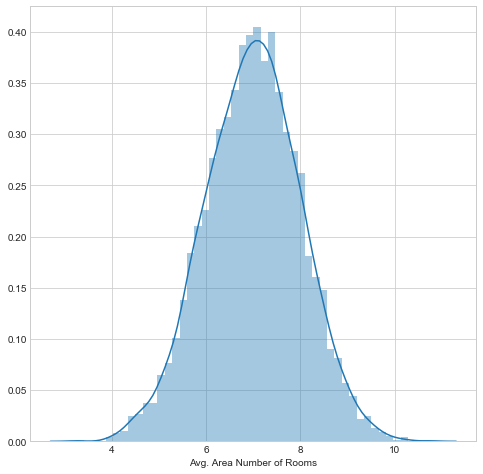

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(df_house['Avg. Area Number of Rooms'])

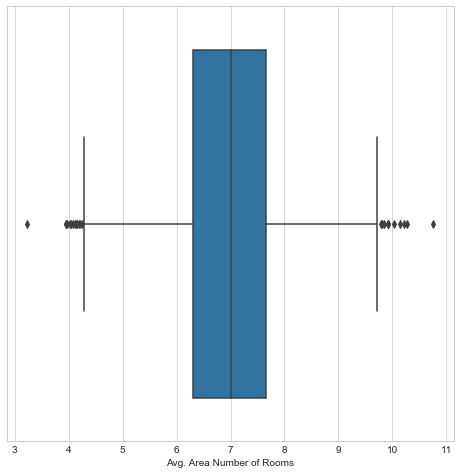

In [23]:
plt.figure(figsize=(8,8))
sns.boxplot(df_house['Avg. Area Number of Rooms'])

### `4.Avg. Area Number of Bedrooms `

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


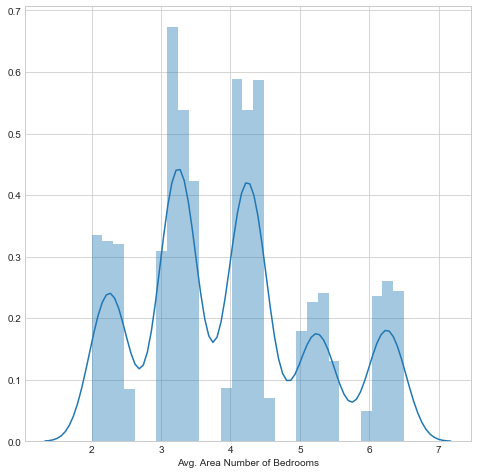

In [24]:
plt.figure(figsize=(8,8))
sns.distplot(df_house['Avg. Area Number of Bedrooms'])

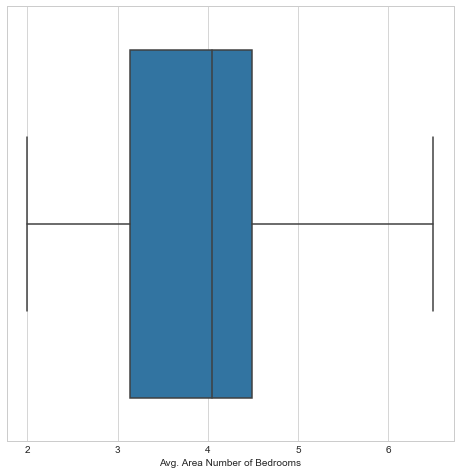

In [25]:
plt.figure(figsize=(8,8))
sns.boxplot(df_house['Avg. Area Number of Bedrooms'])

### `5. Area Population`

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


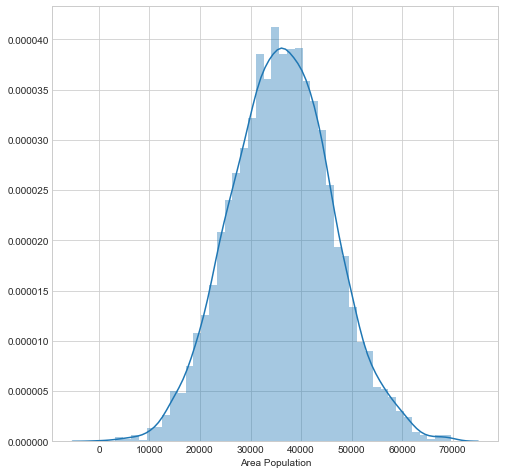

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(df_house['Area Population'])

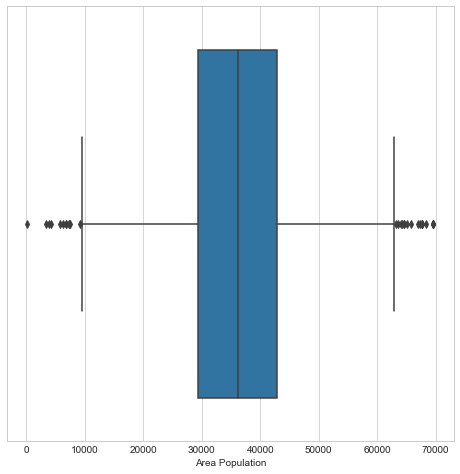

In [27]:
plt.figure(figsize=(8,8))
sns.boxplot(df_house['Area Population'])

### `6. Price`

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


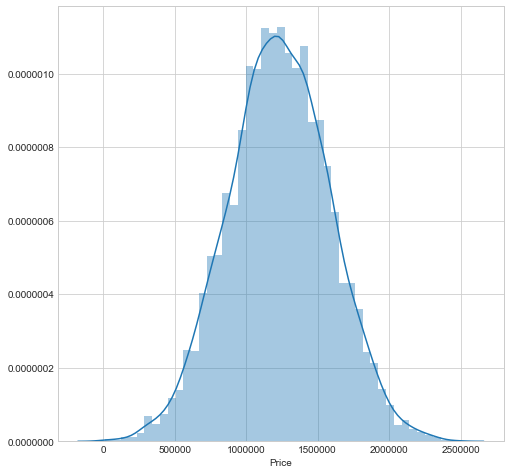

In [28]:
plt.figure(figsize=(8,8))
sns.distplot(df_house['Price'])

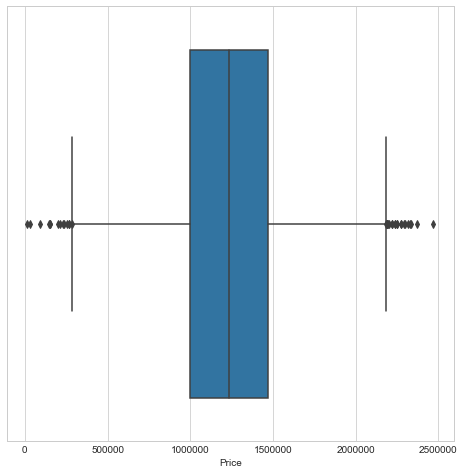

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(df_house['Price'])

## `Z_Score`

In [30]:
z_score = stats.zscore(df_house)
pd.DataFrame(z_score, columns=df_house.columns)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518
5,1.087804,-0.997435,-0.878245,0.047544,-0.948656,-0.464296
6,-0.364518,0.048533,1.153356,-0.462985,2.485197,0.764647
7,0.920644,1.021386,-0.365220,-1.265245,0.035552,0.968227
8,-0.812190,-0.620459,-0.591281,-1.362489,-0.682756,-1.226918
9,1.248279,-1.567095,1.173171,1.716893,0.401671,0.886712


In [31]:
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [32]:
df_house_final =df_house[filtered_entries]
df_house_final

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06


In [33]:
df_house_final.shape

(4943, 6)

#### `Outlier Records`


In [34]:
outlier_records = (5000-4943)
outlier_records 

57

###  `Using Z_Score 57 outlier records we have removed `

## `Training a Linear Regression Model`.

 To train out regression model! We need to first split up our data into an `X array that contains the features to train` on, and a `y array with the target variable`, in this case the **`'Price'`** column.

### `X and y arrays`

In [35]:
# Defining X and y variables.
X = df_house_final[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df_house_final['Price']

### `Train Test Split`

Now let's `split the data into a training set and a testing set`. We will `train out model on the training set` and then use the `test set to evaluate the model`.

In [36]:
# Importing the 'train test split' parameter from 'model_selection' module of 'sklearn' library
from sklearn.model_selection import train_test_split

In [37]:
# Splitting the data interms of Training and Testing Set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [38]:
# Number of records training and testing Records 
print("X_train Shape",X_train.shape)
print("X_test Shape",X_test.shape)
print("y_train Shape",y_train.shape) 
print("y_test Shape",y_test.shape)

X_train Shape (2965, 5)
X_test Shape (1978, 5)
y_train Shape (2965,)
y_test Shape (1978,)


## `Creating and Training the Model`.

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# Assigning the algorithm to the variable.
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## `Model Evaluation`.

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [41]:
# printing the intercept
# The intercept (often labeled as constant) is the point where the function crosses the y-axis.
print(lm.intercept_)

-2615752.0824348447


In [42]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.333196
Avg. Area House Age,166704.013741
Avg. Area Number of Rooms,118388.211614
Avg. Area Number of Bedrooms,2794.438466
Area Population,15.177191


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.


## `Predictions from our Model`.

Let's grab predictions off our test set and see how well it did!

In [43]:
# Predicting the Test Dataset.
predictions = lm.predict(X_test)
predictions

array([1015539.16295821, 1126404.4462286 ,  888440.78388704, ...,
       1357854.35460643, 1005373.95703166, 1165274.13167792])

<Figure size 720x576 with 0 Axes>

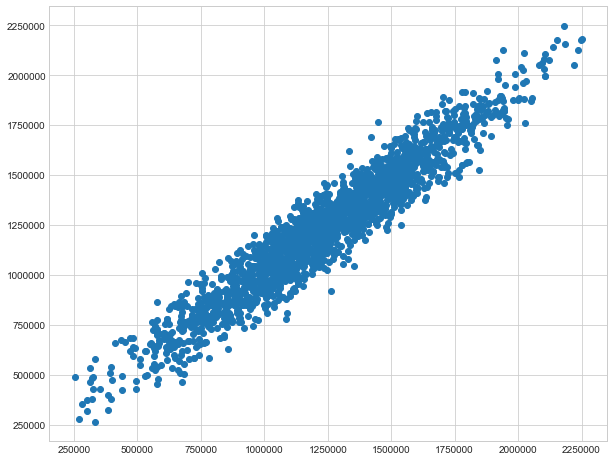

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions)

**`Residual Histogram`**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


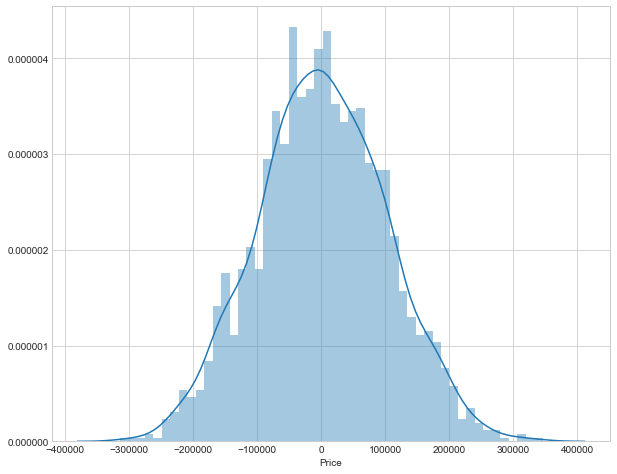

In [45]:
# Data Distribution in Price Variable.
plt.figure(figsize=(10,8))
sns.distplot((y_test-predictions),bins=50);

## `Regression Evaluation Metrics`.


Here are three common evaluation metrics for regression problems:

**`Mean Absolute Error`** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**`Mean Squared Error`** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**`Root Mean Squared Error`** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **`MAE`** is the easiest to understand, because it's the average error.
- **`MSE`** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **`RMSE`** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **`loss functions`**, because we want to minimize them.

In [46]:
# importing the metrics for our model.
from sklearn import metrics

In [47]:
# Different Metrics which we apply for Regression Problems.
print('R2_Score:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2_Score: 0.9156463962723852
MAE: 80145.09963215231
MSE: 10030535589.43788
RMSE: 100152.5615720231


## `Predicting the random data.`

In [48]:
# 61287.067179, 5.865890, 8.512727, 5.13, 36882.159400, price=1.058988e+06
lm.predict([[61287.06,5.86,8.15,5.13,36882.15]])

array([1207549.12958202])

#### `From above test data, the model predicted $1207549.12 as the price of the house.`